**Here, the patch aggressiveness is set to 1 instead of 10. There are only three types of labels, and also the ratio of the most frequent fault is ~41 %, so, setting PA to 10 may emphasise the misclassification too much. So, after experimenting with different PA values, we decide to set up to 1 ***

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import glob
from tqdm import tqdm

In [2]:
import sys
sys.path.insert(0, "../")
import utils.data_util as data_util

In [3]:
# change "results" to "results/rev"
resultdir = "/Users/jeongju.sohn/workdir/arachne/arachne/results/rq5/lstm/us_airline/all/pred"
datadir = "/Users/jeongju.sohn/workdir/arachne/arachne/data/lstm/us_airline"
locdir = "/Users/jeongju.sohn/workdir/arachne/arachne/results/rq5/loc/lstm/us_airline/all"

In [4]:
#ll_resultdir = "/Users/jeongju.sohn/workdir/arachne/arachne/results/rq5/lstm/us_airline/only_the_last/pred"
#ll_locdir = "/Users/jeongju.sohn/workdir/arachne/arachne/results/rq5/loc/lstm/us_airline/only_last"

In [5]:
#train_result_file = "/Users/jeongju.sohn/workdir/arachne/arachne/indices/lstm/us_airline/n_64_dnn1_v2/us_airline.init_pred.indices.csv"
#predictions_for_train = pd.read_csv(train_result_file)

In [6]:
# get train and test data
#train_datafile = os.path.join(datadir, "train_data.pkl")
#with open(train_datafile, 'rb') as f:
#    train_X, train_y = pickle.load(f)   
test_datafile = os.path.join(datadir, "test_data.pkl")
with open(test_datafile, 'rb') as f:
    test_X, test_y = pickle.load(f)

In [7]:
top_n = 0 # target the most frequent

# same. "indices" to the "/volume1/coinse/Arachne/indices"
init_entire_test_pred_file = "/Users/jeongju.sohn/workdir/arachne/arachne/indices/lstm/us_airline/n_64_dnn1_v2/test/us_airline.init_pred.indices.csv"
outs = data_util.get_balanced_dataset(init_entire_test_pred_file, top_n, idx = 0)
misclf_key, misclf_indices, val_data_indices, eval_data_indices = outs

misclf_key, len(misclf_indices), len(val_data_indices), len(eval_data_indices)
    

((1, 2), 144, 1465, 1463)

In [8]:
val_X = test_X[val_data_indices]
val_y = test_y[val_data_indices]

eval_X = test_X[eval_data_indices]
eval_y = test_y[eval_data_indices]

len(val_X), len(val_y), len(eval_X), len(eval_y)

(1465, 1465, 1463, 1463)

In [10]:
raw_tweets_datafile = os.path.join(datadir, "Tweets.csv")
tweets_df = pd.read_csv(raw_tweets_datafile)
tweets_df

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)


In [189]:
raw_tweets_datafile = os.path.join(datadir, "Tweets.csv")
tweets_df = pd.read_csv(raw_tweets_datafile)
len(tweets_df), raw_tweets_datafile

(14640,
 '/Users/jeongju.sohn/workdir/arachne/arachne/data/lstm/us_airline/Tweets.csv')

In [193]:
#tweets_df['negativereason_confidence']
#datadir

In [192]:
#tweets_df.text.apply(lambda v:len(v)).max(), tweets_df.text.apply(lambda v:len(v)).min()

In [190]:
#test_X.shape, eval_X.shape, val_X.shape

In [191]:
#len(tweets_df) * 0.8 + 2928, len(tweets_df)

# Evaluation

## Get Results

In [11]:
def get_prediction_results(pred_dir, for_eval = True):
    """
    e.g., pred.misclf-rq5.0.0-1-2.eval.pkl
    """
    predictions = {}
    for i in range(30):
        pat = os.path.join(pred_dir, 
                           "*.0.{}-*.eval.pkl".format(i) if for_eval else "*.0.{}-*.train.pkl".format(i))
        pred_files = glob.glob(pat)
        assert len(pred_files) == 1, pat
        pred_file = pred_files[0]
        predictions[i] = pd.read_pickle(pred_file)
        
    return predictions

In [12]:
predictions_for_eval = get_prediction_results(resultdir, for_eval = True)
predictions_for_val = get_prediction_results(resultdir, for_eval = False)

## General Evaluation

In [13]:
def count_each_classification(predictions, classes = [0,1,2], is_new = True):
    """
    """
    pred_type = 'new_pred' if is_new else 'pred'
    cnt_per_clf = {(a_class, b_class):[] for a_class in classes for b_class in classes}
    for i, preds in predictions.items():
        for (a_class, b_class) in cnt_per_clf.keys():
            cnt_per_clf[(a_class, b_class)].append(np.sum([(preds.true == a_class) & (preds[pred_type] == b_class)]))
    
    for k in cnt_per_clf.keys():
        cnt_per_clf[k] = np.mean(np.mean(cnt_per_clf[k]))
    return cnt_per_clf

In [14]:
def count_overall_patched_broken(predictions):
    """
    ** CURRENTLY 
    """
    cnt_patcheds = []; cnt_brokens = []
    for i,preds in predictions.items():
        cnt_patched = np.sum([(preds.true != preds.pred) & (preds.true == preds.new_pred)])
        cnt_broken = np.sum([(preds.true == preds.pred) & (preds.true != preds.new_pred)])
        cnt_patcheds.append(cnt_patched)
        cnt_brokens.append(cnt_broken)
        
        print ("For iter {}, patched: {}, broken: {}".format(i, cnt_patched, cnt_broken))
    
    print ()
    print ("For average:\n\tpatched: {}, broken: {}".format(np.mean(cnt_patcheds), np.mean(cnt_brokens)))
    return cnt_patcheds, cnt_brokens

In [98]:
# eval
init_acc_val = np.sum(predictions_for_val[0].true == predictions_for_val[0].pred)/len(predictions_for_val[0])
acc_vs = []
for i in range(30):
    acc_vs.append(
        np.sum(predictions_for_val[i].true == predictions_for_val[i].new_pred)/len(predictions_for_val[i]))

avg_acc_val =np.mean(acc_vs)

# eval
init_acc_eval = np.sum(predictions_for_eval[0].true == predictions_for_eval[0].pred)/len(predictions_for_eval[0])
acc_vs = []
for i in range(30):
    acc_vs.append(
        np.sum(predictions_for_eval[i].true == predictions_for_eval[i].new_pred)/len(predictions_for_eval[i]))

avg_acc_eval =np.mean(acc_vs)

accs = {'val':{'init':init_acc_val, 'aft':avg_acc_val}, 'eval':{'init':init_acc_eval, 'aft':avg_acc_eval}}

In [121]:
# per layer 
# eval
target_label = 1

accs_p_layer = {}
for target_label in [0,1,2]:
    n_target_label = np.sum(predictions_for_val[0].true == target_label)
    init_acc_val = np.sum(
        (predictions_for_val[0].true == target_label).values & 
        (predictions_for_val[0].true == predictions_for_val[0].pred).values)/n_target_label
    acc_vs = []
    for i in range(30):
        acc_vs.append(
            np.sum(
                (predictions_for_val[i].true == target_label).values & 
                (predictions_for_val[i].true == predictions_for_val[i].new_pred).values)/n_target_label)

    avg_acc_val =np.mean(acc_vs)

    # eval
    n_target_label = np.sum(predictions_for_eval[0].true == target_label)
    init_acc_eval = np.sum(
        (predictions_for_eval[0].true == target_label).values & 
        (predictions_for_eval[0].true == predictions_for_eval[0].pred).values)/n_target_label
    acc_vs = []
    for i in range(30):
        acc_vs.append(
            np.sum(
                (predictions_for_eval[i].true == target_label).values & 
                (predictions_for_eval[i].true == predictions_for_eval[i].new_pred).values)/n_target_label)

    avg_acc_eval =np.mean(acc_vs)

    accs_p_layer[target_label] = {
        'val':{'init':init_acc_val, 'aft':avg_acc_val}, 
        'eval':{'init':init_acc_eval, 'aft':avg_acc_eval}}

In [122]:
accs_p_layer

{0: {'val': {'init': 0.5427350427350427, 'aft': 0.5360398860398861},
  'eval': {'init': 0.5427350427350427, 'aft': 0.5236467236467237}},
 1: {'val': {'init': 0.4370860927152318, 'aft': 0.4870860927152318},
  'eval': {'init': 0.43853820598006643, 'aft': 0.4682170542635659}},
 2: {'val': {'init': 0.9203444564047363, 'aft': 0.9000717617509867},
  'eval': {'init': 0.9213362068965517, 'aft': 0.899676724137931}}}

In [132]:
print (0, accs_p_layer[0]['eval'])
print (1, accs_p_layer[1]['eval'])
print (2, accs_p_layer[2]['eval'])

0 {'init': 0.5427350427350427, 'aft': 0.5236467236467237}
1 {'init': 0.43853820598006643, 'aft': 0.4682170542635659}
2 {'init': 0.9213362068965517, 'aft': 0.899676724137931}


In [116]:
len(d.loc[d.true == 2]), len(d.loc[d.true == 1]), len(d.loc[d.true == 0])

(929, 302, 234)

In [130]:
0.021 * 234, 0.021 * 234

4.914000000000001

## Plot

In [74]:
def plot_generalisability_one_datatype(changes, data_type, figsize = (8,6), num_classes = None, 
                                       title = None, filepath = None, targeted = None):
    """
    """
    import numpy as np
    import matplotlib.pyplot as plt
    import matplotlib.patches as patches
    from matplotlib.lines import Line2D
    
    fig = plt.figure(figsize = figsize)    
    ax = fig.add_subplot(1,1,1)
    
    val_color = 'red'
    eval_color = 'blue'
    width = 0.2; height = 0.002 if num_classes is not None else 1
    
    xs = width + 0.1
    xs_val = xs - width - 0.05
    xs_eval = xs + 0.05
    
    # val
    val_cnt_init = changes['val'][data_type]['init']
    if num_classes is not None: 
        val_cnt_init = val_cnt_init/num_classes['val'][data_type[0]]
    
    val_cnt_aft = changes['val'][data_type]['after']
    if num_classes is not None: 
        val_cnt_aft = val_cnt_aft/num_classes['val'][data_type[0]]
    
    print ("{} ({}):\n\tinit cnt {} -> aft cnt {}".format(
        data_type, 'val', val_cnt_init, val_cnt_aft)) 
    
    val_rect_1 = patches.Rectangle(xy=(xs_val, val_cnt_init), edgecolor = val_color, facecolor = val_color,
            alpha = 0.3, width=width, height=height, fill = True)
            
    val_rect_2 = patches.Rectangle(xy=(xs_val, val_cnt_aft),edgecolor = val_color, facecolor = val_color,
            width=width, height=height, fill = True)
    
    ax.add_patch(val_rect_1); ax.add_patch(val_rect_2)
    
    dx = 0; dy = np.min(val_cnt_aft - val_cnt_init + height*2, 0)
    if dy < 0:
        ax.arrow(xs_val + width/2, val_cnt_init, dx, dy, head_width=width/5, 
            head_length=height, fc='k', ec='k')
    else:
        dy = np.min(val_cnt_aft - val_cnt_init + height)
        ax.arrow(xs_val + width/2, val_cnt_init + height, dx, np.max([dy-height*2, -height/2]), 
                head_width=width/10, head_length=height, fc='k', ec='k')    

    # eval
    eval_cnt_init = changes['eval'][data_type]['init']
    if num_classes is not None: 
        eval_cnt_init = eval_cnt_init/num_classes['eval'][data_type[0]]
    
    eval_cnt_aft = changes['eval'][data_type]['after']
    if num_classes is not None: 
        eval_cnt_aft = eval_cnt_aft/num_classes['eval'][data_type[0]]
    
    print ("{} ({}):\n\tinit cnt {} -> aft cnt {}".format(
        data_type, 'eval', eval_cnt_init, eval_cnt_aft))     

    eval_rect_1 = patches.Rectangle(xy=(xs_eval, eval_cnt_init), edgecolor = eval_color, facecolor = eval_color,
            alpha = 0.3, width=width, height=height, fill = True)
            
    eval_rect_2 = patches.Rectangle(xy=(xs_eval, eval_cnt_aft), edgecolor = eval_color, facecolor = eval_color,
            width=width, height=height, fill = True)
    
    ax.add_patch(eval_rect_1); ax.add_patch(eval_rect_2)
    
    
    dx = 0; dy = np.min(eval_cnt_aft - eval_cnt_init + height*2, 0)
    if dy < 0:
        ax.arrow(xs_eval + width/2, eval_cnt_init, dx, dy, head_width=width/5, 
            head_length=height, fc='k', ec='k')
    else:
        dy = np.min(eval_cnt_aft - eval_cnt_init + height)
        ax.arrow(xs_eval + width/2, eval_cnt_init + height, dx, np.max([dy-height*2, -height/2]), 
                head_width=width/10, head_length=height, fc='k', ec='k')
    
    #ax.set_xticks([xs])
    #ftypes = [data_type]
    ax.set_xticks([xs_val + width/2, xs_eval + width/2])
    ax.set_xticklabels(['validation', 'evaluation'], fontsize = 16)
        
    ax.set_ylabel("Error Count" if num_classes is None else "Erro Count Percentage (0~1)", fontsize = 18)
    ax.tick_params(axis='both', which='major', labelsize=16)
    
    ax.grid(which='minor', axis='x', zorder = 100)
    ax.grid(which='major', axis='y', zorder = 100)
    
    if title is not None:
        ax.set_title(title, fontsize = 18)
    
    legend_elements = [Line2D([0], [0], color='r', lw=4, alpha = 0.3, 
                              label='Before Repair (val): {:.1f}'.format(val_cnt_init)),
                       Line2D([0], [0], color='r', lw=4, label='After Repair (val): {:.1f}'.format(val_cnt_aft))]
    
    legend_elements.extend([Line2D([0], [0], color='b', lw=4, alpha = 0.3, 
                                   label='Before Repair (eval): {:.1f}'.format(eval_cnt_init)),
                       Line2D([0], [0], color='b', lw=4, label='After Repair (eval): {:.1f}'.format(eval_cnt_aft))])
    
    ax.legend(handles=legend_elements, fontsize = 14, bbox_to_anchor = (1.02, 0.3)) #(1.05, -0.1))#1.05))

    
    plt.tight_layout()
    if filepath is not None:
        plt.savefig(filepath)
    
    plt.show()
    

(1, 2) (val):
	init cnt 144.0 -> aft cnt 130.43333333333334
(1, 2) (eval):
	init cnt 143.0 -> aft cnt 130.26666666666668


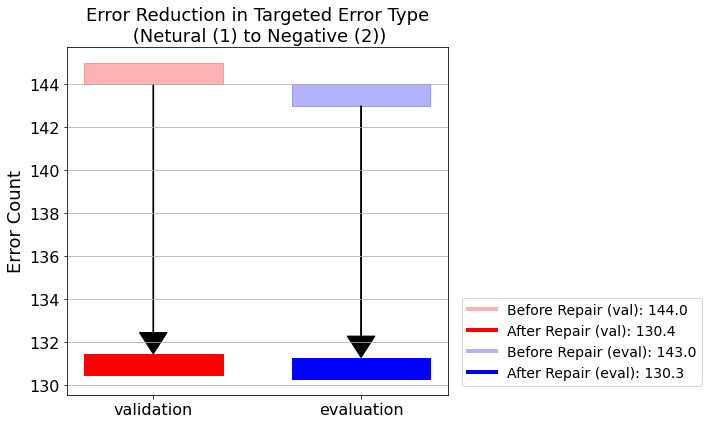

In [76]:
val_init_cnts = count_each_classification(predictions_for_val, classes = [0,1,2], is_new = False)
val_aft_cnts = count_each_classification(predictions_for_val, classes = [0,1,2], is_new = True)

val_init_aft_cnts = {}
for k in val_init_cnts.keys():
    val_init_aft_cnts[k] = {'init':val_init_cnts[k], 'after':val_aft_cnts[k]}
    
eval_init_cnts = count_each_classification(predictions_for_eval, classes = [0,1,2], is_new = False)
eval_aft_cnts = count_each_classification(predictions_for_eval, classes = [0,1,2], is_new = True)

eval_init_aft_cnts = {}
for k in eval_init_cnts.keys():
    eval_init_aft_cnts[k] = {'init':eval_init_cnts[k], 'after':eval_aft_cnts[k]}
    

filepath = "/Users/jeongju.sohn/workdir/Journals/autopatch_nn_icse20/figures/rev/rq7/chgs_in_err_cnt.pdf"
plot_generalisability_one_datatype(
    {'val':{(1,2):val_init_aft_cnts[(1,2)]}, 'eval':{(1,2):eval_init_aft_cnts[(1,2)]}}, 
    (1,2),
    figsize = (10,6),
    num_classes = None, #{'val':num_classes, 'eval':num_classes_eval},
    title = 'Error Reduction in Targeted Error Type\n (Netural (1) to Negative (2))', filepath = filepath)

In [133]:
val_init_aft_cnts

{(0, 0): {'init': 127.0, 'after': 125.43333333333334},
 (0, 1): {'init': 32.0, 'after': 39.266666666666666},
 (0, 2): {'init': 75.0, 'after': 69.3},
 (1, 0): {'init': 26.0, 'after': 24.466666666666665},
 (1, 1): {'init': 132.0, 'after': 147.1},
 (1, 2): {'init': 144.0, 'after': 130.43333333333334},
 (2, 0): {'init': 27.0, 'after': 31.233333333333334},
 (2, 1): {'init': 47.0, 'after': 61.6},
 (2, 2): {'init': 855.0, 'after': 836.1666666666666}}

In [142]:
val_d = pd.DataFrame(val_init_aft_cnts)
eval_d = pd.DataFrame(eval_init_aft_cnts)

In [141]:
d[(0,1)]

init     32.000000
after    39.266667
Name: (0, 1), dtype: float64

In [147]:
val_d.to_csv("/Users/jeongju.sohn/workdir/Journals/autopatch_nn_icse20/figures/rev/rq7/cnt_val.csv")
eval_d.to_json("/Users/jeongju.sohn/workdir/Journals/autopatch_nn_icse20/figures/rev/rq7/cnt_val.json")

### summary of the impact of patches on overall classification types

In [80]:
data_types = [(0,0), (0,1), (0,2), (1,1), (1,0), (1,2), (2,2), (2,0), (2,1)] 

#print ("Error,  Val  Eval")
for data_type in data_types:
    val_init_cnt = np.round(val_init_aft_cnts[data_type]['init'], decimals = 1)
    val_aft_cnt = np.round(val_init_aft_cnts[data_type]['after'], decimals = 1)
    if data_type[0] != data_type[1]:
        val_ratio = np.round((val_init_cnt - val_aft_cnt)/val_init_cnt, decimals = 4)
    else:
        val_ratio = np.round((val_aft_cnt - val_init_cnt)/val_init_cnt, decimals = 4)
    #val_cnt = np.round(val_init_cnt - val_aft_cnt, decimals = 4)
    
    eval_init_cnt = np.round(eval_init_aft_cnts[data_type]['init'], decimals = 1)
    eval_aft_cnt = np.round(eval_init_aft_cnts[data_type]['after'], decimals = 1)
    if data_type[0] != data_type[1]: 
        eval_ratio = np.round((eval_init_cnt - eval_aft_cnt)/eval_init_cnt, decimals = 4)
    else:
        eval_ratio = np.round((eval_aft_cnt - eval_init_cnt)/eval_init_cnt, decimals = 4)
    #eval_cnt = np.round(eval_init_cnt - eval_aft_cnt, decimals = 4)
    
    print ("{}: {} -> {} ({})| {} -> {} ({})".format(
        data_type, 
        val_init_cnt, val_aft_cnt, val_ratio, 
        eval_init_cnt, eval_aft_cnt, eval_ratio))
    #print ("{}: {}, {}".format(data_type, val_cnt, eval_cnt))

(0, 0): 127.0 -> 125.4 (-0.0126)| 127.0 -> 122.5 (-0.0354)
(0, 1): 32.0 -> 39.3 (-0.2281)| 32.0 -> 44.4 (-0.3875)
(0, 2): 75.0 -> 69.3 (0.076)| 75.0 -> 67.1 (0.1053)
(1, 1): 132.0 -> 147.1 (0.1144)| 132.0 -> 140.9 (0.0674)
(1, 0): 26.0 -> 24.5 (0.0577)| 26.0 -> 29.8 (-0.1462)
(1, 2): 144.0 -> 130.4 (0.0944)| 143.0 -> 130.3 (0.0888)
(2, 2): 855.0 -> 836.2 (-0.022)| 855.0 -> 834.9 (-0.0235)
(2, 0): 27.0 -> 31.2 (-0.1556)| 26.0 -> 28.1 (-0.0808)
(2, 1): 47.0 -> 61.6 (-0.3106)| 47.0 -> 65.0 (-0.383)


## The impact of confidence 

In [18]:
def get_confs_of_target_patched_and_broken(confidences, predictions, target_label, pred_label, by_mean = False):
    """
    ** CURRENTLY NOT USED **
    patched: 
        true == target_label & pred == pred_label 
        -> new_pred == 
    
    broken:
        true == target_label & pred == target_label 
        -> new_pred !- target_label
    """
    confs_of_patched_all = np.array([]); confs_of_broken_all = np.array([])
    if isinstance(confidences, list):
        confidences = np.array(confidences)
        
    for i, preds in predictions.items():
        # for patched
        target_preds = preds.loc[(preds.true == target_label) & (preds.pred == pred_label)]
        indices_of_patched = target_preds.loc[target_preds.true == target_preds.new_pred].index.values
        confs_of_patched = confidences[indices_of_patched]
        if not by_mean:
            confs_of_patched_all = np.append(confs_of_patched_all, confs_of_patched)
        else:
            if len(confs_of_patched) > 0:
                confs_of_patched_all = np.append(confs_of_patched_all, np.mean(confs_of_patched))
        
        # for broken
        target_preds = preds.loc[(preds.true == target_label) & (preds.pred == target_label)]
        indices_of_broken = target_preds.loc[target_preds.true != target_preds.new_pred].index.values
        confs_of_broken = confidences[indices_of_broken]
        if not by_mean:
            confs_of_broken_all = np.append(confs_of_broken_all, confs_of_broken)
        else:
            if len(confs_of_broken) > 0:
                confs_of_broken_all = np.append(confs_of_broken_all, np.mean(confs_of_broken))
        #print ("For iter {}, mean conf of patched: {}, broken: {}".format(
        #    i, np.round(np.mean(confs_of_patched), decimals = 2), 
        #    np.round(np.mean(confs_of_broken), decimals = 2)))
    return confs_of_patched_all, confs_of_broken_all

In [19]:
def get_confs_of_target_patched_and_not_patched(
    confidences, predictions, target_label, pred_label, by_mean = False):
    """
    true == target_label & pred == pred_label 
        - patched: new_pred == target_label
        - not_patched: new_pred == pred_label
    by_mean: take the average of all confidence values of a single iteration
    """
    patched_confs = np.array([]); not_patched_confs = np.array([])
    if isinstance(confidences, list):
        confidences = np.array(confidences)
        
    for i, preds in predictions.items():
        # from 1 -> 2 to 1 -> 
        target_preds = preds.loc[(preds.true == target_label) & (preds.pred == pred_label)]
        indices_to_patched = target_preds.loc[target_preds.new_pred == target_label].index.values
        indices_to_not_patched = target_preds.loc[target_preds.new_pred != target_label].index.values
        
        if by_mean:
            if len(indices_to_patched) > 0:
                patched_confs = np.append(patched_confs, np.mean(confidences[indices_to_patched]))
            if len(indices_to_not_patched) > 0:
                not_patched_confs = np.append(not_patched_confs, np.mean(confidences[indices_to_not_patched]))
        else:
            patched_confs = np.append(patched_confs, confidences[indices_to_patched])
            not_patched_confs = np.append(not_patched_confs, confidences[indices_to_not_patched])
            
    return patched_confs, not_patched_confs

### The complete data to reference

In [23]:
complete_data_file = os.path.join(datadir, "entire_data.pkl")
with open(complete_data_file, 'rb') as f:
    entire_data = pickle.load(f)
    
embedded_vector, labels, tweet_ids = entire_data

### Generate a dictionary for pairs of x and y

In [24]:
embedded_vector_d2 = {}
for i,vector in enumerate(tqdm(embedded_vector)):
    k = ",".join([str(v) for v in vector.flatten()])
    k += "," + str(labels[i])
    try:
        _ = embedded_vector_d2[k]
    except Exception:
        embedded_vector_d2[k] = []
    embedded_vector_d2[k].append([i, tweet_ids[i]])

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14640/14640 [02:01<00:00, 120.39it/s]


### Get confidence data

In [25]:
def get_tweet_id(target_data_vector, target_label, ref_d):
    """
    return (idx_to_complete_d, matching tweet id)
    """
    k = ",".join([str(v) for v in target_data_vector.flatten()])
    k += "," + str(target_label)
    return ref_d[k]

In [26]:
def get_matching_confidences(tweets_df, X_arr, y_arr, ref_d):
    """
    """
    matching_confidences = []
    num = len(y_arr)
    for idx in tqdm(range(num)):
        matching_tweet_ids = get_tweet_id(X_arr[idx], y_arr[idx], ref_d)
        confs = []
        for _, matching_tweet_id in matching_tweet_ids:
            conf = tweets_df.loc[
                tweets_df.tweet_id == matching_tweet_id].airline_sentiment_confidence.values[0]
            confs.append(conf)
        matching_confidences.append(np.mean(confs))
    
    return matching_confidences

In [28]:
confidences_of_val_data = get_matching_confidences(tweets_df, val_X, val_y, embedded_vector_d2)
confidences_of_eval_data = get_matching_confidences(tweets_df, eval_X, eval_y, embedded_vector_d2)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1463/1463 [00:12<00:00, 119.27it/s]


In [155]:
tweets_df.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

### Plot

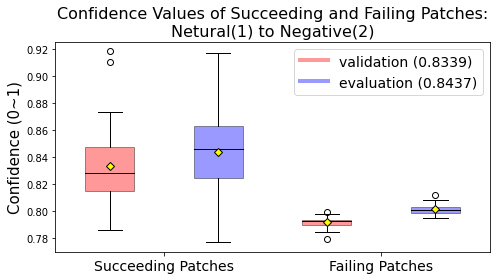

In [29]:
from matplotlib.lines import Line2D

val_confs_of_patched, val_confs_of_not_patched = get_confs_of_target_patched_and_not_patched(
    np.array(confidences_of_val_data), predictions_for_val, 1, 2, by_mean = True)

eval_confs_of_patched, eval_confs_of_not_patched = get_confs_of_target_patched_and_not_patched(
    np.array(confidences_of_eval_data), predictions_for_eval, 1, 2, by_mean = True)

print ()
median_props = {'linestyle':'-', 'color':'black'}
meanpointprops = dict(marker='D', markeredgecolor='black', markerfacecolor='yellow')

fig = plt.figure(figsize = (7,4))
ax = fig.add_subplot(111)
boxes = ax.boxplot([val_confs_of_patched, eval_confs_of_patched, 
                     val_confs_of_not_patched, eval_confs_of_not_patched], patch_artist = True, 
                    medianprops = median_props, meanprops = meanpointprops, showmeans = True)

for patch, color in zip(boxes['boxes'], ['r', 'b', 'r', 'b']):
    patch.set_alpha(0.4)
    patch.set_edgecolor('k')
    patch.set_facecolor(color)

ax.set_xticks([1.5,3.5])
ax.set_xticklabels(['Succeeding Patches', 'Failing Patches'], fontsize = 14)

legend_elements = [Line2D([0], [0], color='r', lw=4, alpha = 0.4, 
                          label='validation ({:.4f})'.format(
                              np.round(np.mean(val_confs_of_patched), decimals = 4))),
                Line2D([0], [0], color='b', lw=4, alpha = 0.4, 
                       label='evaluation ({:.4f})'.format(
                           np.round(np.mean(eval_confs_of_patched), decimals = 4)))]
    
ax.legend(handles=legend_elements, fontsize =14)
ax.set_ylabel("Confidence (0~1)", fontsize = 15)
plt.title("Confidence Values of Succeeding and Failing Patches:\nNetural(1) to Negative(2)", fontsize = 16)
plt.tight_layout()

filepath = "/Users/jeongju.sohn/workdir/Journals/autopatch_nn_icse20/figures/rev/rq7/conf_distr.pdf"

plt.savefig(filepath)
plt.show()